#  DBscan clustering 29 March

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Reading the data

In [2]:
df = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.K-MEANS CLUSTERING\2.K-MEANS CLUSTERING\Mall_Customers.csv")
df = df.drop(['CustomerID'],axis=1)
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data visualization

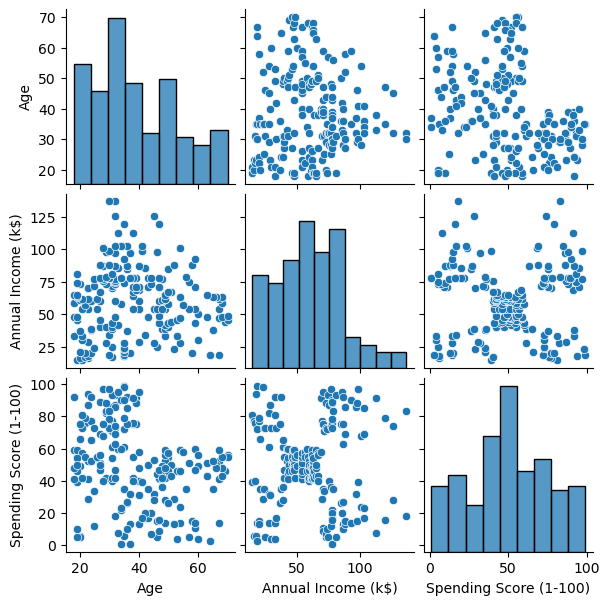

In [3]:
g = sns.pairplot(data=df)
g.fig.set_size_inches(6, 6)

**Conclusion:** Frrom the above plot it is clear that there is clustering of data between Annual Income and Spending Score

## Spliting the data

In [4]:
X = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X,test_size=0.2, random_state=0)

## Trainning the model

In [5]:
from sklearn.cluster import DBSCAN

model_DB = DBSCAN(eps=10, min_samples=5)
model_DB.fit(X_train)
labels = model_DB.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


## Ploting the clusters

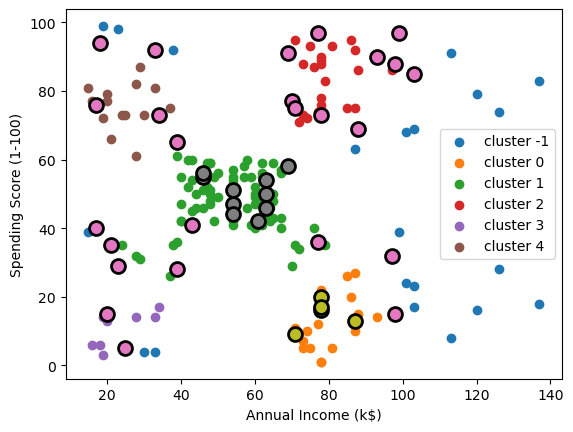

In [6]:
num_clus = 5
y_pred = model_DB.fit_predict(X_train)
y_test = model_DB.fit_predict(X_test)
for n in range(-1,num_clus):
    plt.scatter(X_train[:,0][y_pred==n],X_train[:,1][y_pred==n],label=f'cluster {n}')
  
for n in range(-1,num_clus):
    plt.scatter(X_test[:,0][y_test==n],X_test[:,1][y_test==n],edgecolor='black',s=100,
                linewidth=2)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();